   ## Assignment 1
   
   

### Step 1: Problem Statment
The objective of this assignment is to apply binary classification algorithm which involves a large number of features. The inputs are the characteristics of the test culture (such as the radius, smoothness, compactness mean area and so on of the distribution of cells), while the output is binary-either benign or malign.

So the method to approach this would be to understand the significance of the features, execute some strategies for feature reduction, apply a binary classification algorithm and iterate this process, until performance saturates.

In short, the objective of this study is to build a predictive model that wil improve the accuracy, objectivity and reproducibility of breast cancer diagnosis.

##### Data Exploration & Exploratory Visualization
The dataset has 569 rows and 33 columns. Amongst the 33 columns, the first two are ID number and Diagnonsis (M=malignant, B = benign). The other 30 columns correspond to mean, standard deviation and the largest values (points on the tails) of the distributions of the following 10 features computed for the cellnuclei;



### Step 2:  Common imports Modules

In [1]:

import pandas as pd
import numpy as np
import sklearn
# to make this notebook's output stable across runs

from IPython.display import display

# To plot pretty figures
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as snb




### Step 3: Loading the the required data

In [2]:
from sklearn.datasets import load_breast_cancer

bc = load_breast_cancer() # to inctiate and assign to bc which stands for breast cancer
print("The shape of the dataFrame is:  ", bc.data.shape)  # to see the data frame 
print("The Feature are: \n", bc.feature_names)  # to see the features of the data frame.
print("The keys are: \n", bc.keys())  # to see the keys

The shape of the dataFrame is:   (569, 30)
The Feature are: 
 ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
The keys are: 
 dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])


In [3]:
print("The tagret names are :", bc['target_names'])

The tagret names are : ['malignant' 'benign']


In [4]:
print("The description of the dataset is : \n", bc['DESCR'])

The description of the dataset is : 
 .. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  F

#### To create a dataFrame to the data for simplicity of data visualization and analysis purposes

In [80]:
df_bc = pd.DataFrame(bc['data'], columns=bc['feature_names'])
df_bc['target'] = bc['target']

In [21]:
#df_bc.count()

In [23]:
#df_bc.info()

In [89]:
df_bc.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
2,19.69,21.25,130.00,1203.0,0.10960,0.1599,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.2839,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.1328,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0
5,12.45,15.70,82.57,477.1,0.12780,0.1700,0.1578,0.08089,0.2087,0.07613,...,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440,0
6,18.25,19.98,119.60,1040.0,0.09463,0.1090,0.1127,0.07400,0.1794,0.05742,...,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368,0


In [25]:
#df_bc.tail()

### Step 4: Visualize the data

In [53]:
#snb.pairplot(X, vars = X.columns)

In [55]:
#snb.pairplot(, hue = 'target', vars = ['mean radius', 'mean texture', \
                                            'mean perimeter', 'mean area', 'mean smoothness', \
                                            'mean compactness', 'mean concavity'])

IndentationError: unexpected indent (<ipython-input-55-78aa25b578ad>, line 2)

In [60]:
df_bc.groupby(['target']).size() # number of counts of each item in the target

target
0    212
1    357
dtype: int64

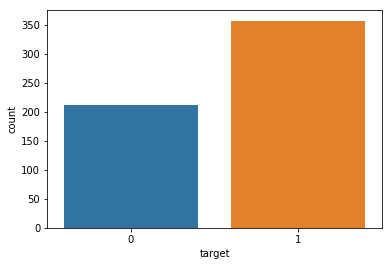

In [61]:
snb.countplot(df_bc['target'])

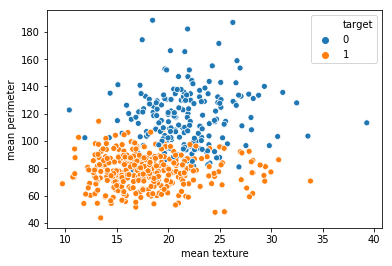

In [62]:
snb.scatterplot(x ='mean texture', y= 'mean perimeter', hue ='target', data =df_bc)

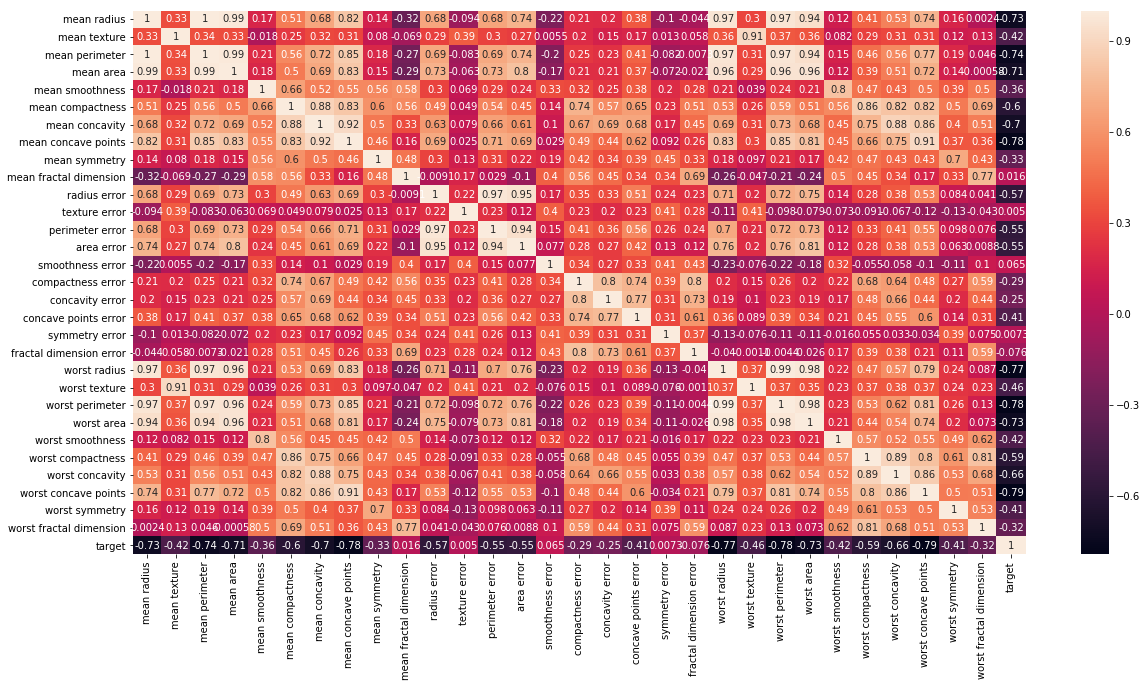

In [90]:
plt.figure(figsize =(20, 10))
snb.heatmap(df_bc.corr(), annot = True)

### Step 5: Model training

In [95]:
X = df_bc.drop(['target'] , axis=1)
y = df_bc['target']
#X.count()

In [106]:
X = X
y = y

In [20]:
#y = df_bc['target'] 

In [5]:
#y

In [50]:
from sklearn.model_selection import train_test_split

In [107]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [108]:
X_test.shape()

TypeError: 'tuple' object is not callable

In [3]:
#y_train

In [4]:
#y_test

In [109]:
from sklearn.neighbors import KNeighborsClassifier


In [110]:
knn = KNeighborsClassifier()   # by default it takes 5 neighbor points

In [112]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [113]:
print("The accurcy of the knn, n=5 for the training set: {:.3f}".format(knn.score(X_train, y_train)))
print("The accurcy of the knn, n=5 for the testing set: {:.3f}".format(knn.score(X_test, y_test)) )

The accurcy of the knn, n=5 for the training set: 0.947
The accurcy of the knn, n=5 for the testing set: 0.921


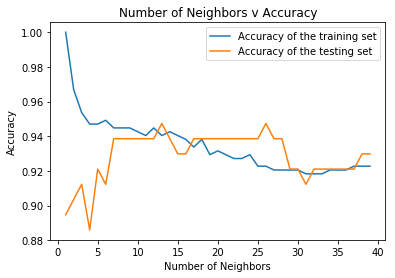

In [117]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

training_accuracy = []
testing_accuracy =[]

neighbors = range(1,40)
for n_neighbors in neighbors:
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)
    training_accuracy.append(clf.score(X_train, y_train))
    testing_accuracy.append(clf.score(X_test, y_test))
plt.plot(neighbors,training_accuracy, label='Accuracy of the training set')
plt.plot(neighbors,testing_accuracy, label='Accuracy of the testing set')
plt.title("Number of Neighbors v Accuracy")
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.legend()

#### From the above graph we see the method will have better accuracy for n=9.